<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Bidu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (BIDU Inc.) using the past 60 day stock price. 

In [ ]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 25)


     |████████████████████████████████| 6.3 MB 10.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=ca2e5588861e90329546bae9b2f4c858da139fa85de80b5b1e177b521d83be0a
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 62 kB 835 kB/s 


In [ ]:
#Get the stock quote
data = yf.download('BIDU', start=start_date, end=end_date)
#df = web.DataReader('BIDU', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,129.490005,138.639999,129.440002,138.220001,138.220001,8001400
2020-01-03,134.580002,137.160004,133.779999,133.800003,133.800003,5184800
2020-01-06,132.779999,136.740005,132.509995,135.940002,135.940002,3930700
2020-01-07,138.190002,139.470001,135.399994,136.699997,136.699997,4535800
2020-01-08,136.740005,139.169998,135.699997,137.830002,137.830002,3818900
...,...,...,...,...,...,...
2021-07-15,182.779999,186.289993,181.710007,185.520004,185.520004,3912200
2021-07-16,185.449997,185.500000,179.130005,179.580002,179.580002,3795600
2021-07-19,175.309998,177.550003,172.699997,176.449997,176.449997,3998500


In [ ]:
#Get the number of rows and columns in the data set
data.shape



(415, 6)

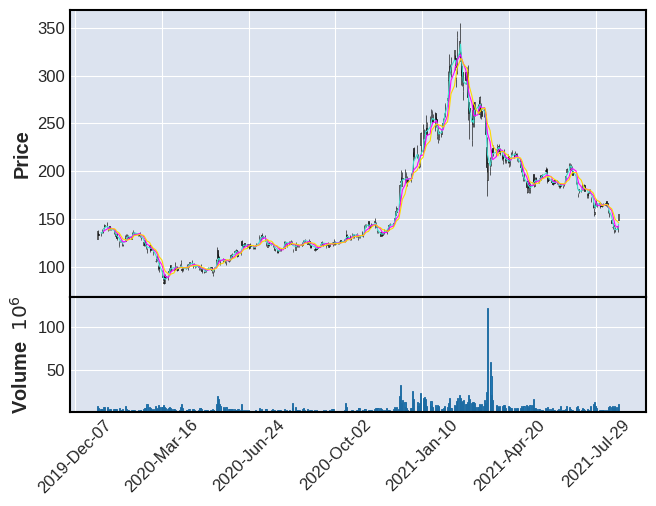

In [ ]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

332

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.21303991],
       [0.19579383],
       [0.20414374],
       [0.20710911],
       [0.2115182 ],
       [0.22334074],
       [0.23758239],
       [0.22880328],
       [0.22014121],
       [0.21764404],
       [0.21799525],
       [0.21846345],
       [0.20866988],
       [0.19969566],
       [0.19735454],
       [0.18096686],
       [0.16645205],
       [0.16898825],
       [0.16719341],
       [0.16434506],
       [0.15583907],
       [0.18287878],
       [0.18631235],
       [0.18389323],
       [0.19329666],
       [0.18451754],
       [0.1850638 ],
       [0.19653519],
       [0.21019159],
       [0.20117831],
       [0.19879825],
       [0.19727648],
       [0.20363648],
       [0.19056539],
       [0.18018651],
       [0.16469624],
       [0.15923367],
       [0.15576104],
       [0.14159741],
       [0.14187054],
       [0.14495296],
       [0.13402785],
       [0.14745016],
       [0.13508133],
       [0.1175231 ],
       [0.08985914],
       [0.11038277],
       [0.096

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.21303991, 0.19579383, 0.20414374, 0.20710911, 0.2115182 ,
       0.22334074, 0.23758239, 0.22880328, 0.22014121, 0.21764404,
       0.21799525, 0.21846345, 0.20866988, 0.19969566, 0.19735454,
       0.18096686, 0.16645205, 0.16898825, 0.16719341, 0.16434506,
       0.15583907, 0.18287878, 0.18631235, 0.18389323, 0.19329666,
       0.18451754, 0.1850638 , 0.19653519, 0.21019159, 0.20117831,
       0.19879825, 0.19727648, 0.20363648, 0.19056539, 0.18018651,
       0.16469624, 0.15923367, 0.15576104, 0.14159741, 0.14187054,
       0.14495296, 0.13402785, 0.14745016, 0.13508133, 0.1175231 ,
       0.08985914, 0.11038277, 0.09610206, 0.06001013, 0.0650435 ,
       0.02364508, 0.02930272, 0.        , 0.02341098, 0.01966523,
       0.0296539 , 0.04998243, 0.05189432, 0.07101329, 0.05466462])]
[0.059815030422169624]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(272, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

272/272 [==============================] - 10s 24ms/step - loss: 0.0101


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

0.761265766189759

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


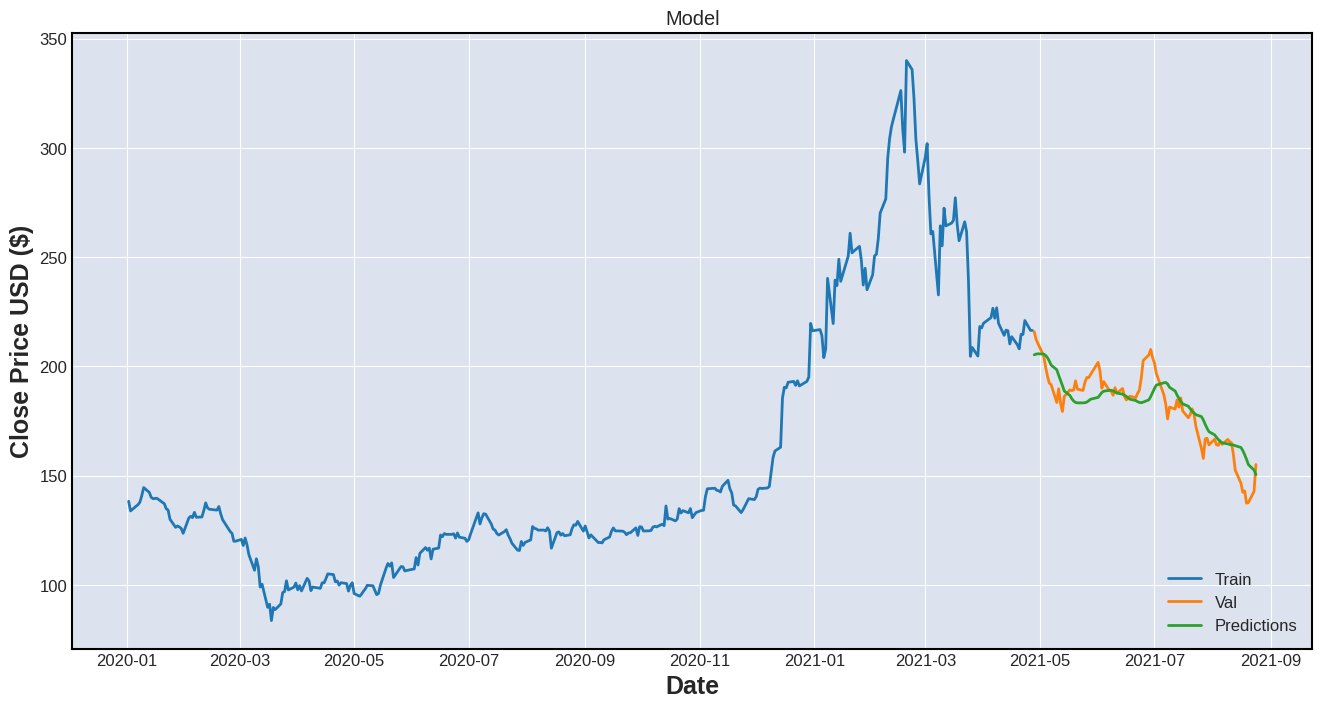

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-28,215.830002,205.257248
2021-04-29,212.289993,205.593124
2021-04-30,210.330002,205.716064
2021-05-03,204.940002,205.596939
2021-05-04,199.979996,205.048203
...,...,...
2021-08-18,142.960007,159.541000
2021-08-19,137.330002,157.419052
2021-08-20,137.649994,154.990509


In [ ]:
#get the quote
apple_quote = yf.download('BIDU', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[149.30492]]
